<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Otras_aplicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

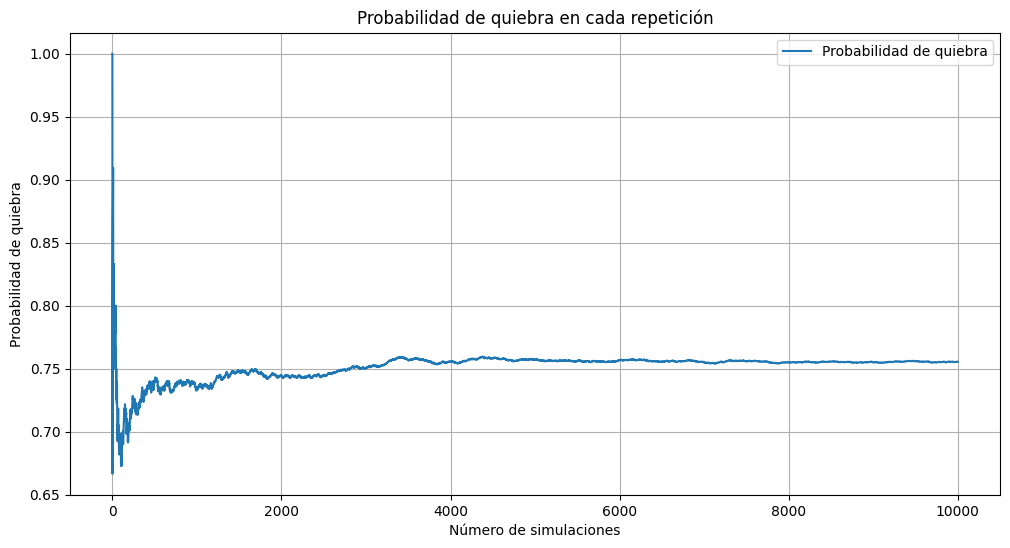

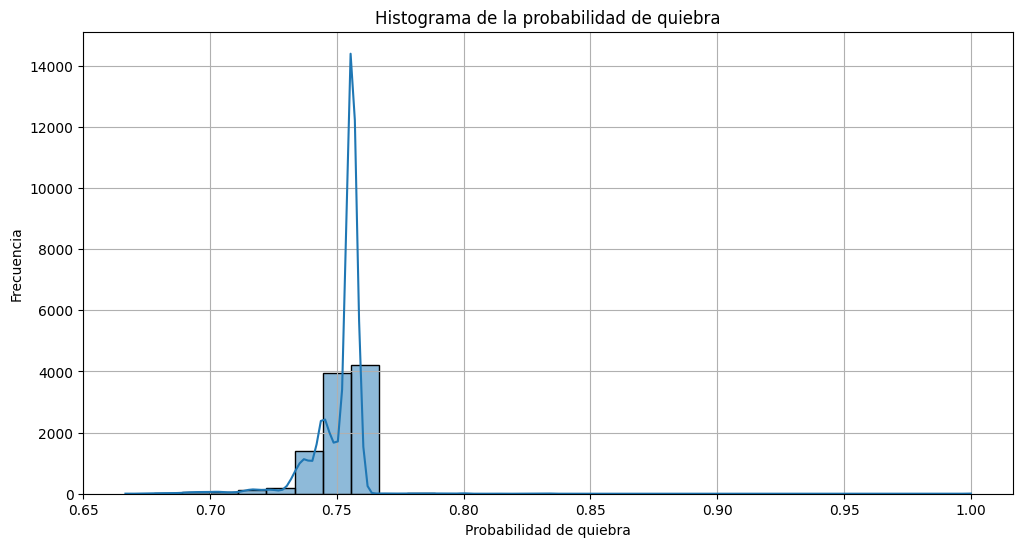

In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

def lanzar_dados():
    return random.randint(1, 6) + random.randint(1, 6)

def jugar_7_11():
    primer_tiro = lanzar_dados()

    if primer_tiro in [7, 11]:
        return True  # El jugador gana
    elif primer_tiro in [2, 3, 12]:
        return False  # El jugador pierde
    else:
        punto = primer_tiro
        while True:
            siguiente_tiro = lanzar_dados()
            if siguiente_tiro == punto:
                return True  # El jugador gana
            elif siguiente_tiro == 7:
                return False  # El jugador pierde

def simular_juego(inicial, objetivo, apuestas):
    capital = inicial
    while capital > 0 and capital < objetivo:
        if jugar_7_11():
            capital += apuestas  # Gana $1
        else:
            capital -= apuestas  # Pierde $1
    return capital == 0

def estimar_probabilidad_quiebra(num_simulaciones, inicial, objetivo, apuestas):
    quiebras = 0
    quiebras_acumuladas = []
    for i in range(num_simulaciones):
        if simular_juego(inicial, objetivo, apuestas):
            quiebras += 1
        quiebras_acumuladas.append(quiebras / (i + 1))
    return quiebras_acumuladas

# Parámetros del problema
num_simulaciones = 10000
capital_inicial = 20
capital_objetivo = 50
valor_apuesta = 1

# Estimar la probabilidad de quiebra
probabilidades_quiebra = estimar_probabilidad_quiebra(num_simulaciones, capital_inicial, capital_objetivo, valor_apuesta)

# Graficar la probabilidad de quiebra en cada repetición
plt.figure(figsize=(12, 6))
plt.plot(probabilidades_quiebra, label='Probabilidad de quiebra')
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad de quiebra')
plt.title('Probabilidad de quiebra en cada repetición')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el histograma de las probabilidades de quiebra
plt.figure(figsize=(12, 6))
sns.histplot(probabilidades_quiebra, kde=True, bins=30)
plt.xlabel('Probabilidad de quiebra')
plt.ylabel('Frecuencia')
plt.title('Histograma de la probabilidad de quiebra')
plt.grid(True)
plt.show()
